## Covid Brazil Analysis using dataset from 2020-10-05

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
covid_df = pd.read_csv("datasets/2020-10-05.csv")
covid_df.drop(covid_df.tail(1).index, inplace=True)
covid_df.head()

,Estado,Secretarias,Ministério,Óbitos,Óbitos Ministério
0,Acre (AC),28687,28687,667,667
1,Alagoas (AL),88135,88135,2103,2103
2,Amapá (AP),48701,48701,718,718
3,Amazonas (AM),142573,142573,4185,4185
4,Bahia (BA),316005,316005,6953,6953


In [6]:
covid_df.shape

(27, 5)

[Text(0, 0.5, 'Número de Casos')]

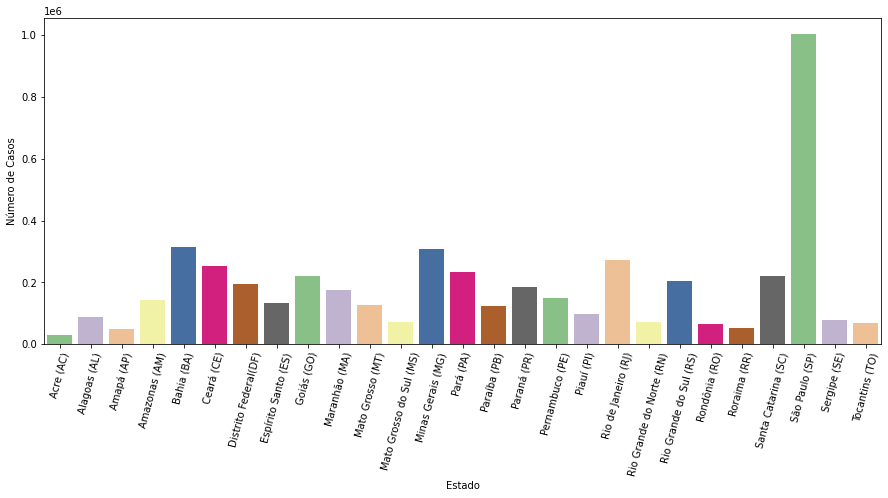

In [12]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=75)
barplot = sb.barplot(data=covid_df, x="Estado", y="Secretarias", palette="Accent")
barplot.set(ylabel="Número de Casos")


<AxesSubplot:xlabel='Estado', ylabel='Óbitos'>

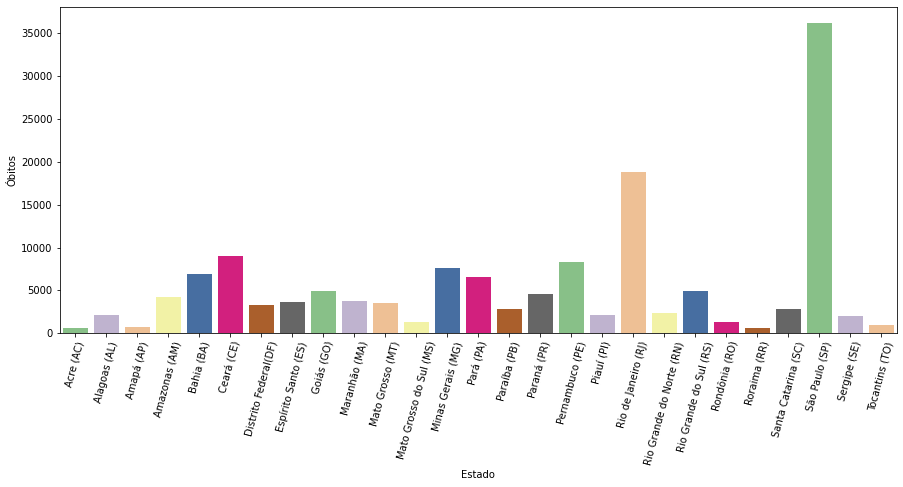

In [87]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=75)
sb.barplot(data=covid_df, x="Estado", y="Óbitos", palette="Accent")


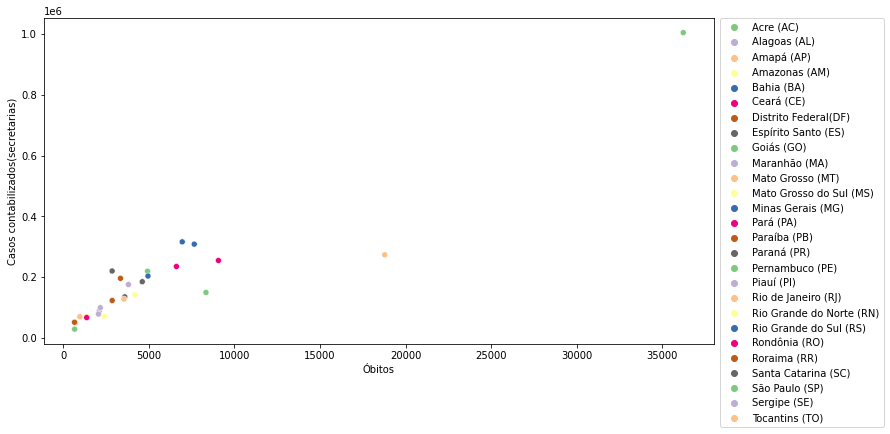

In [13]:
plt.figure(figsize=(12, 6))
scatter = sb.scatterplot(data=covid_df, x="Óbitos", y="Secretarias", hue="Estado", palette="Accent")
scatter.set(ylabel="Casos contabilizados(secretarias)")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

A histogram of deaths in all states. Rio de Janeiro and São Paulo are the worst states in covid-19 pandemia.

<Figure size 864x432 with 0 Axes>

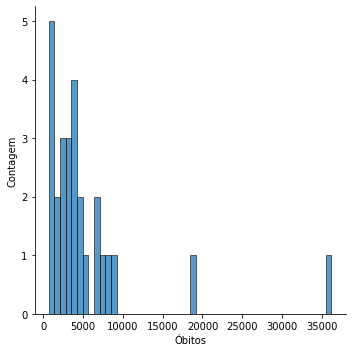

In [11]:
plt.figure(figsize=(12, 6))
displot = sb.displot(covid_df, x="Óbitos", palette="Accent", bins=50)
displot.set(ylabel="Contagem")

**Kernel Density Estimation** shows the places where patterns happens. The number of states that has the same patterns, that is, **more density** are darken.

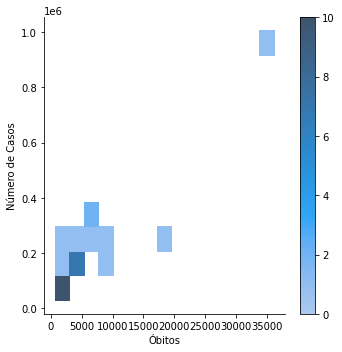

In [10]:

displot = sb.displot(covid_df, x="Óbitos", y="Secretarias", cbar=True)
displot.set(ylabel="Número de Casos")

Death registry in **Cambuquira MG** over time 2015-2020 - Cartórios 
<p></p>
Barely affected by covid-19

In [43]:
deaths_registry = pd.read_csv("datasets/civil_registry_deaths.csv")
deaths_registry.head()

,start_date,end_date,state,state_ibge_code,city,city_ibge_code,deaths_total,created_at
0,2015-01-01,2015-01-31,AC,12,NaN,NaN,249,2020-10-18 21:04
1,2015-02-01,2015-02-28,AC,12,NaN,NaN,209,2020-10-18 21:04
2,2015-03-01,2015-03-31,AC,12,NaN,NaN,254,2020-10-18 21:04
3,2015-04-01,2015-04-30,AC,12,NaN,NaN,216,2020-10-18 21:04
4,2015-05-01,2015-05-31,AC,12,NaN,NaN,244,2020-10-18 21:04


In [5]:
is_cambuquira_df = deaths_registry["city"] == "Cambuquira"
cbq_df = deaths_registry[is_cambuquira_df]
cbq_df

,start_date,end_date,state,state_ibge_code,city,city_ibge_code,deaths_total,created_at
56101,2015-02-01,2015-02-28,MG,31,Cambuquira,3110707.0,5,2020-10-18 21:06
56102,2015-03-01,2015-03-31,MG,31,Cambuquira,3110707.0,8,2020-10-18 21:06
56103,2015-04-01,2015-04-30,MG,31,Cambuquira,3110707.0,6,2020-10-18 21:06
56104,2015-05-01,2015-05-31,MG,31,Cambuquira,3110707.0,9,2020-10-18 21:06
56105,2015-06-01,2015-06-30,MG,31,Cambuquira,3110707.0,5,2020-10-18 21:06
...,...,...,...,...,...,...,...,...
56165,2020-06-01,2020-06-30,MG,31,Cambuquira,3110707.0,5,2020-10-18 21:06
56166,2020-07-01,2020-07-31,MG,31,Cambuquira,3110707.0,9,2020-10-18 21:06
56167,2020-08-01,2020-08-31,MG,31,Cambuquira,3110707.0,9,2020-10-18 21:06
56168,2020-09-01,2020-09-30,MG,31,Cambuquira,3110707.0,10,2020-10-18 21:06


Text(60, 16, 'Covid')

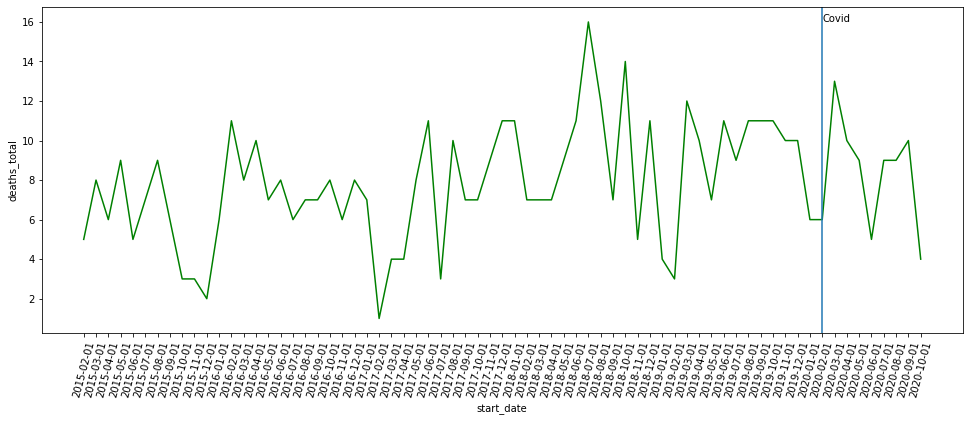

In [80]:
plt.figure(figsize=(16.5, 6))
plt.xticks(rotation=75)
cbq_line = sb.lineplot(data=cbq_df, x="start_date", y="deaths_total", color="green")
cbq_line.axvline(len(cbq_df["start_date"].index) -9, 0, max(cbq_df["deaths_total"]))
cbq_line.text(x=len(cbq_df["start_date"].index) -9, y=max(cbq_df["deaths_total"]), s="Covid")

Death registry in São Paulo SP over time 2015-2020 - Cartórios
<p></p>
Very affected by covid-19

In [18]:
is_sp_df = deaths_registry["city"] == "São Paulo"
sp_df = deaths_registry[is_sp_df]
sp_df

,start_date,end_date,state,state_ibge_code,city,city_ibge_code,deaths_total,created_at
252336,2015-01-01,2015-01-31,SP,35,São Paulo,3550308.0,7391,2020-10-18 21:04
252337,2015-02-01,2015-02-28,SP,35,São Paulo,3550308.0,5908,2020-10-18 21:04
252338,2015-03-01,2015-03-31,SP,35,São Paulo,3550308.0,6763,2020-10-18 21:04
252339,2015-04-01,2015-04-30,SP,35,São Paulo,3550308.0,7478,2020-10-18 21:04
252340,2015-05-01,2015-05-31,SP,35,São Paulo,3550308.0,7493,2020-10-18 21:04
...,...,...,...,...,...,...,...,...
252401,2020-06-01,2020-06-30,SP,35,São Paulo,3550308.0,10842,2020-10-18 21:04
252402,2020-07-01,2020-07-31,SP,35,São Paulo,3550308.0,9885,2020-10-18 21:04
252403,2020-08-01,2020-08-31,SP,35,São Paulo,3550308.0,8601,2020-10-18 21:04
252404,2020-09-01,2020-09-30,SP,35,São Paulo,3550308.0,8456,2020-10-18 21:04


Text(61, 10842, 'Covid')

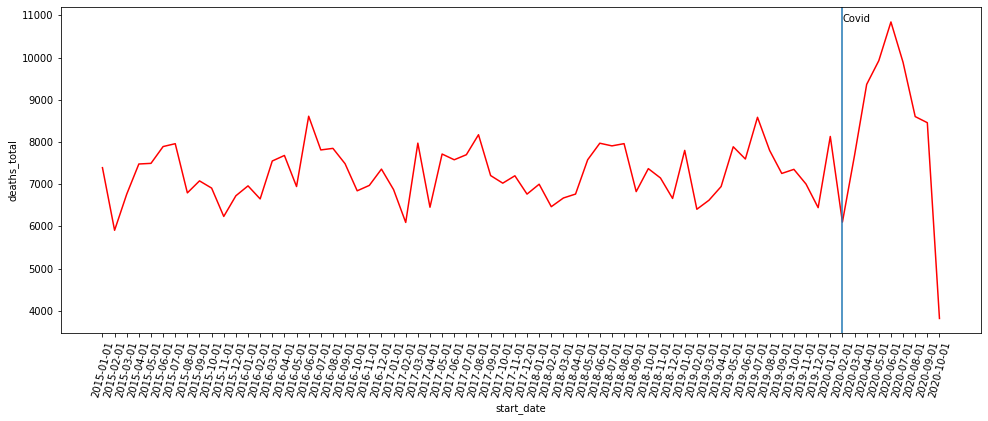

In [89]:
plt.figure(figsize=(16.5, 6))
plt.xticks(rotation=75)
sp_line = sb.lineplot(data=sp_df, x="start_date", y="deaths_total", color="red")
sp_line.axvline(len(sp_df["start_date"].index) -9, 0, max(sp_df["deaths_total"]))
sp_line.text(x=len(sp_df["start_date"].index) -9, y=max(sp_df["deaths_total"]), s="Covid")